In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *
import matplotlib.pyplot as plt

import mlflow
import mlflow.sklearn


# controlar as notificações
from sklearn.exceptions import ConvergenceWarning
import warnings

warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter("ignore", category=ConvergenceWarning)

pd.set_option("display.max_columns", None)

pd.set_option("display.max_rows", None)
pd.set_option("display.width", None)
pd.set_option("display.float_format", lambda x: "%.3f" % x)


# importar Seaborn biblioteca de gráficos
import seaborn as sns

sns.set_theme(
    context="notebook",
    style="white",
    palette="deep",
    font="sans-serif",
    font_scale=1,
    color_codes=True,
)


%config InlineBackend.figure_format = 'retina' # Make visualizations look good
# %config InlineBackend.figure_format = 'svg'
%matplotlib inline

In [36]:
credito = pd.read_csv("Credit.csv")
credito.shape

(1000, 21)

In [37]:
credito.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,'critical/other existing credit',radio/tv,1169,'no known savings',>=7,4,'male single',none,4,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,'existing paid',radio/tv,5951,<100,1<=X<4,2,'female div/dep/mar',none,2,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,<100,4<=X<7,2,'male single',none,3,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,<0,42,'existing paid',furniture/equipment,7882,<100,4<=X<7,2,'male single',guarantor,4,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,<0,24,'delayed previously','new car',4870,<100,1<=X<4,3,'male single',none,4,'no known property',53,none,'for free',2,skilled,2,none,yes,bad


In [38]:
for col in credito.columns:
    if credito[col].dtype == "object":
        credito[col] = credito[col].astype("category").cat.codes

In [39]:
credito.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,2,6,1,7,1169,0,3,4,3,2,4,2,67,1,1,2,3,1,1,1,1
1,1,48,3,7,5951,3,0,2,0,2,2,2,22,1,1,1,3,1,0,1,0
2,0,12,1,4,2096,3,1,2,3,2,3,2,49,1,1,1,2,2,0,1,1
3,2,42,3,5,7882,3,1,2,3,1,4,0,45,1,0,1,3,2,0,1,1
4,2,24,2,1,4870,3,0,3,3,2,4,1,53,1,0,2,3,2,0,1,0


In [40]:
previsores = credito.iloc[:, 0:20].values
classe = credito.iloc[:, 20].values

In [41]:
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(
    previsores, classe, test_size=0.3, random_state=123
)

In [42]:
# def treina_rf(n_estimators):
#     mlflow.set_experiment("rfexperimento")
#     with mlflow.start_run():
#         modelorf = RandomForestClassifier(n_estimators=n_estimators)
#         modelorf.fit(X_treinamento, y_treinamento)
#         previsoes = modelorf.predict(X_teste)

#         # log de hiper parametros
#         mlflow.log_param("n_estimators", n_estimators)

#         # métricas
#         acuracia = accuracy_score(y_teste, previsoes)
#         recall = recall_score(y_teste, previsoes)
#         precision = precision_score(y_teste, previsoes)
#         f1 = f1_score(y_teste, previsoes)
#         auc = roc_auc_score(y_teste, previsoes)
#         log = log_loss(y_teste, previsoes)

#         # registrar métricas
#         mlflow.log_metric("acuracia", acuracia)
#         mlflow.log_metric("recall", recall)
#         mlflow.log_metric("precision", precision)
#         mlflow.log_metric("f1", f1)
#         mlflow.log_metric("auc", auc)
#         mlflow.log_metric("log", log)

#         # gráficos
#         confusion = plot_confusion_matrix(modelorf, X_teste, y_teste).plot()
#         plt.savefig("confusionrf.png")
#         roc = plot_roc_curve(modelorf, X_teste, y_teste).plot()
#         plt.savefig("rocfr.png")

#         # logar gráficos
#         mlflow.log_artifact("confusionrf.png")
#         mlflow.log_artifact("rocfr.png")

#         # modelo
#         mlflow.sklearn.log_model(modelorf, "ModeloNB")

#         # informações da execução
#         print("Modelo: ", mlflow.active_run().info.run_uuid)

#     mlflow.end_run()

In [48]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay, roc_curve


def treina_rf(n_estimators):
    mlflow.set_experiment("rfexperimento")
    with mlflow.start_run():
        modelorf = RandomForestClassifier(n_estimators=n_estimators)
        modelorf.fit(X_treinamento, y_treinamento)
        previsoes = modelorf.predict(X_teste).round()

        # log de hiper parametros
        mlflow.log_param("n_estimators", n_estimators)

        # métricas
        acuracia = accuracy_score(y_teste, previsoes)
        recall = recall_score(y_teste, previsoes)
        precision = precision_score(y_teste, previsoes)
        f1 = f1_score(y_teste, previsoes)
        auc = roc_auc_score(y_teste, previsoes)
        log = log_loss(y_teste, previsoes)

        # registrar métricas
        mlflow.log_metric("acuracia", acuracia)
        mlflow.log_metric("recall", recall)
        mlflow.log_metric("precision", precision)
        mlflow.log_metric("f1", f1)
        mlflow.log_metric("auc", auc)
        mlflow.log_metric("log", log)

        # # gráficos
        # confusion = plot_confusion_matrix(modelorf, X_teste, y_teste).plot()
        # plt.savefig("confusionrf.png")
        # roc = plot_roc_curve(modelorf, X_teste, y_teste).plot()
        # plt.savefig("rocfr.png")

        # # logar gráficos
        # mlflow.log_artifact("confusionrf.png")
        # mlflow.log_artifact("rocfr.png")
        cm = confusion_matrix(y_teste, previsoes, labels=modelorf.classes_)
        cm_display = ConfusionMatrixDisplay(
            confusion_matrix=cm, display_labels=modelorf.classes_
        ).plot()
        plt.savefig("cm_display.png")

        fpr, tpr, _ = roc_curve(y_teste, previsoes)
        roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
        plt.savefig("roc_display.png")

        # logar gráficos
        mlflow.log_artifact("cm_display.png")
        mlflow.log_artifact("roc_display.png")

        # modelo
        mlflow.sklearn.log_model(modelorf, "ModeloNB")

        # informações da execução
        print("Modelo: ", mlflow.active_run().info.run_uuid)

    mlflow.end_run()


In [44]:
# confusion.plot()

c:\ProgramData\Anaconda3\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
c:\ProgramData\Anaconda3\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


Modelo:  4f5e08e69df149398ab95c367ef5cc44


c:\ProgramData\Anaconda3\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
c:\ProgramData\Anaconda3\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


Modelo:  83ea235d72534307ba40488352088b4c


c:\ProgramData\Anaconda3\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
c:\ProgramData\Anaconda3\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


Modelo:  3348e2f80e2644c08559795af85f11f4


c:\ProgramData\Anaconda3\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
c:\ProgramData\Anaconda3\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


Modelo:  2c54bbfcd0ce403f85e408d88379d96a
Modelo:  1394599ef07a4dfb99956956574e7a40


c:\ProgramData\Anaconda3\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
c:\ProgramData\Anaconda3\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


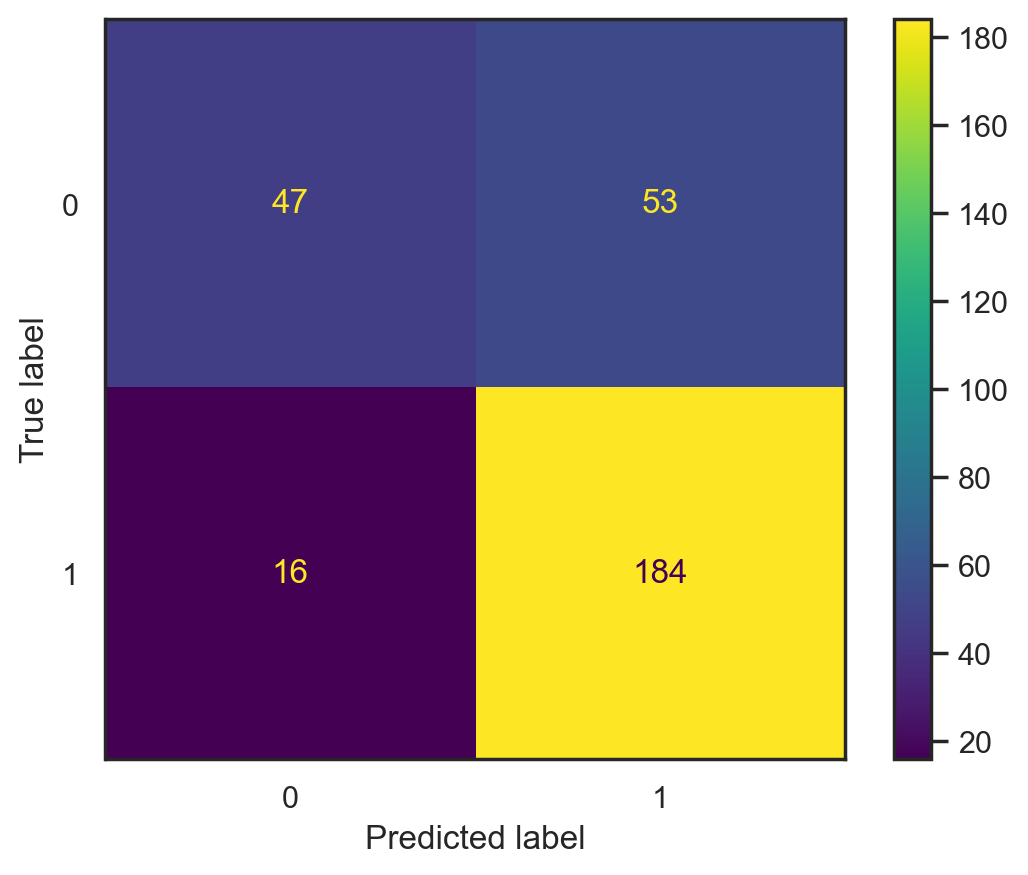

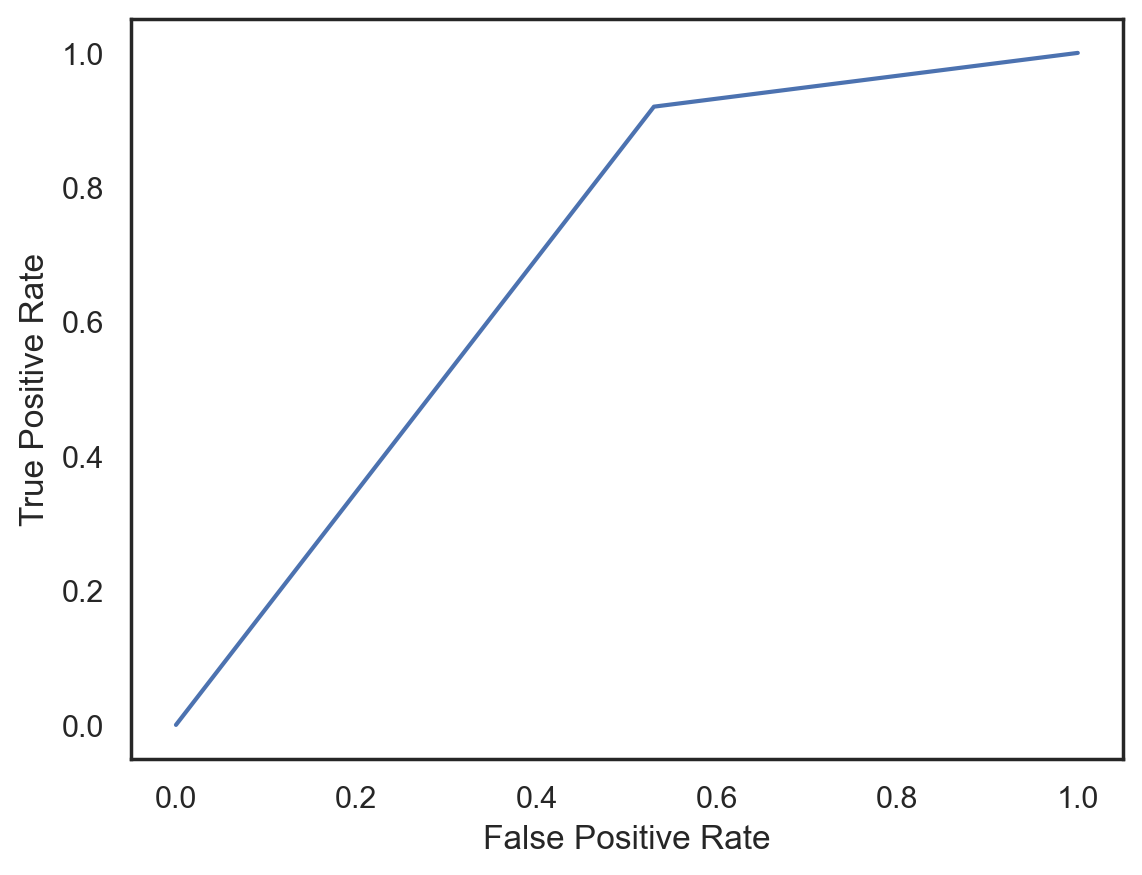

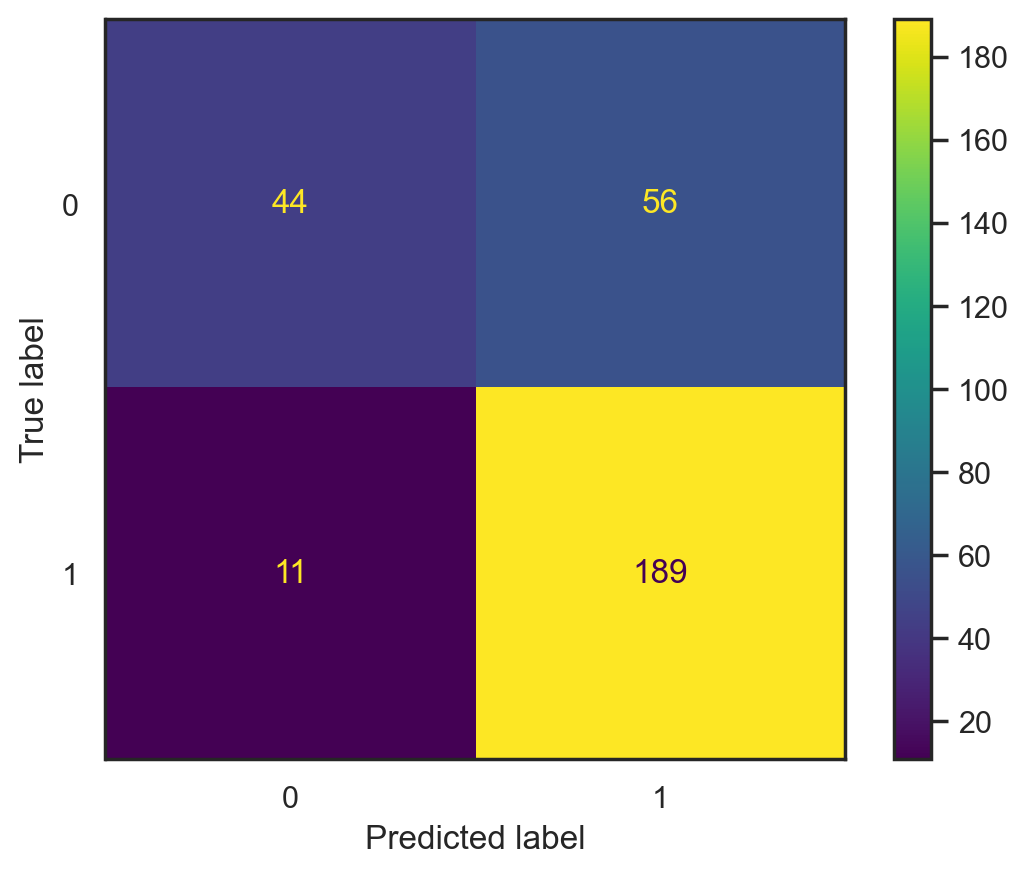

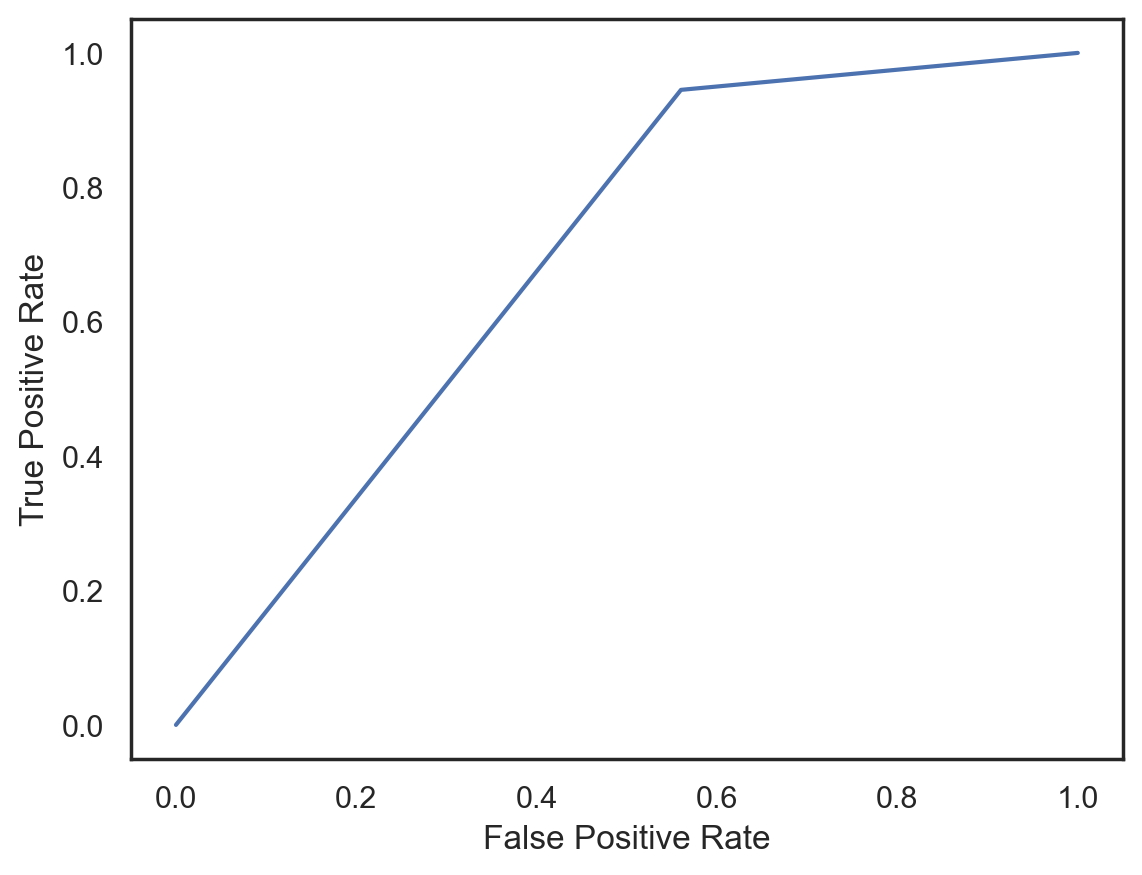

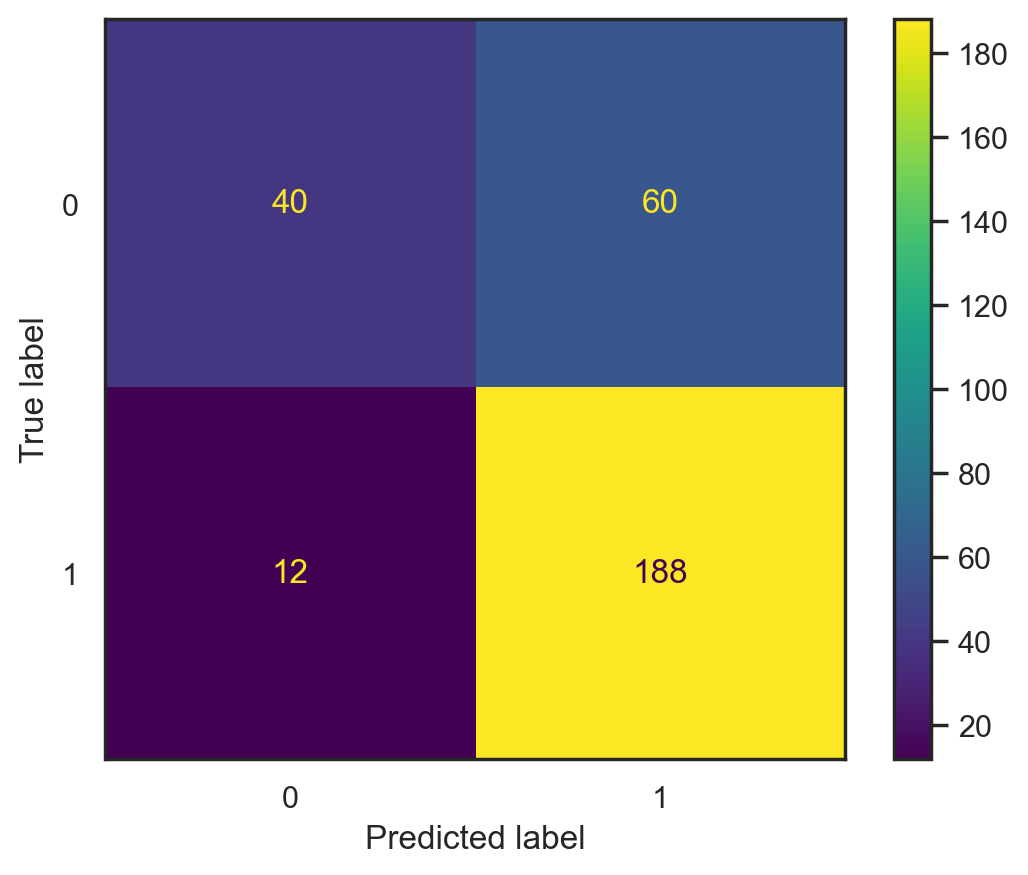

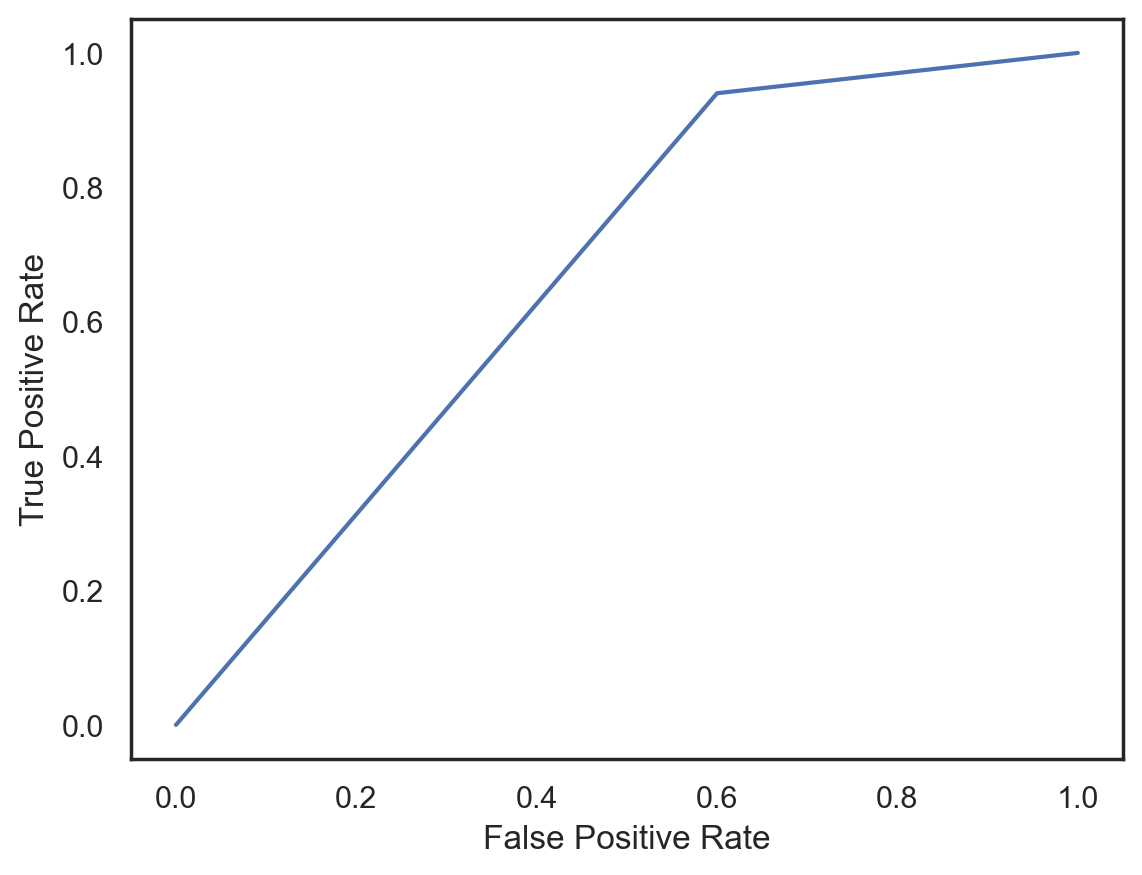

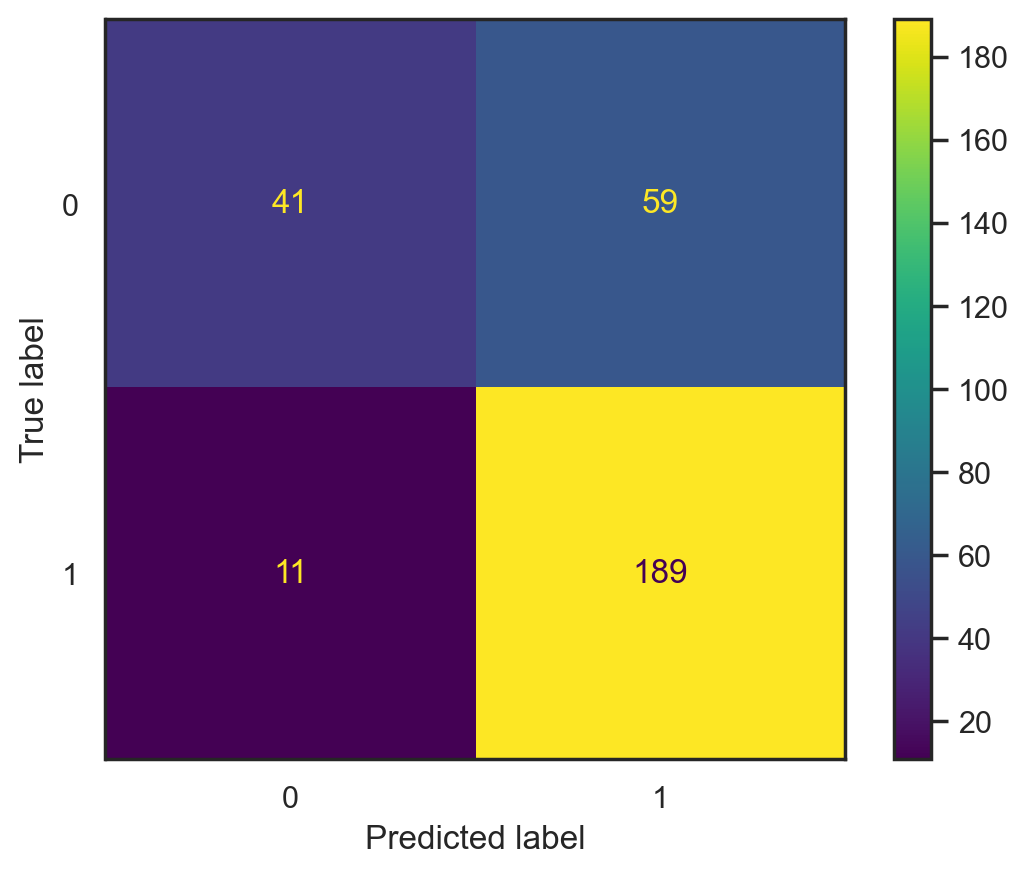

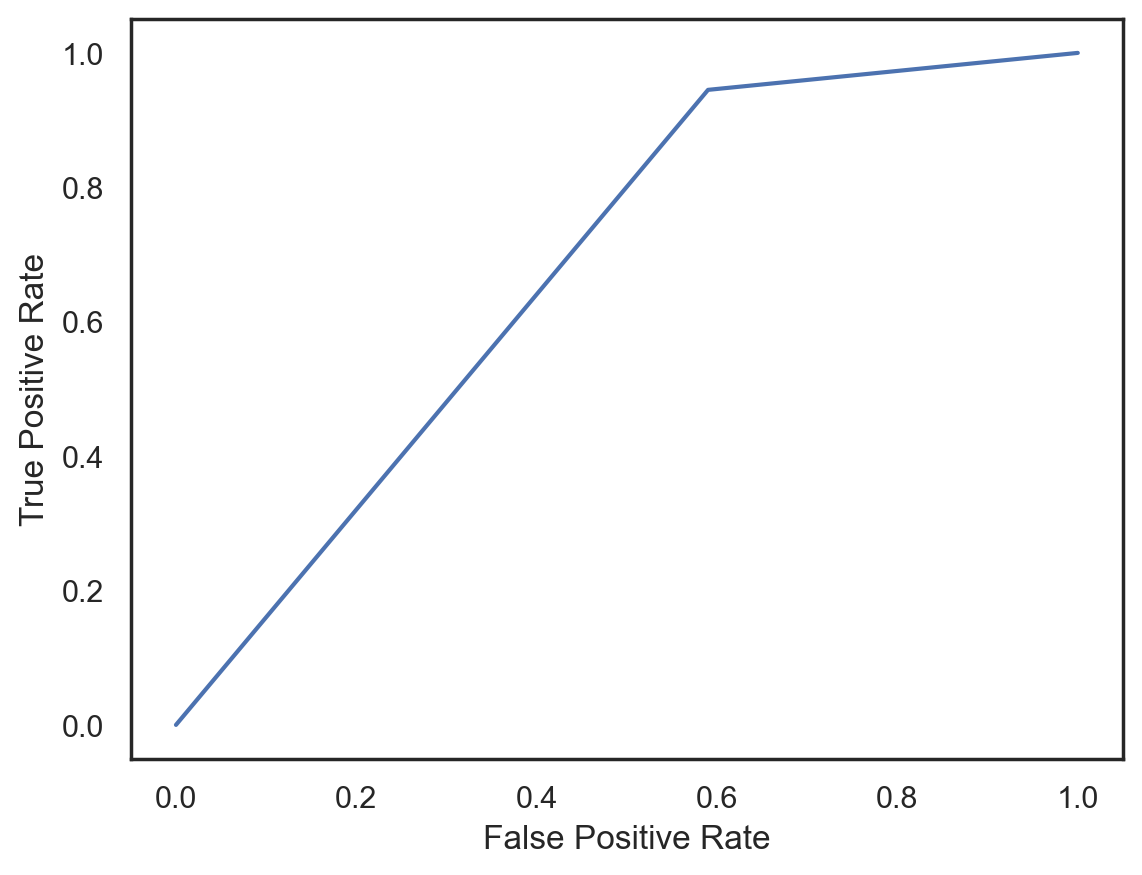

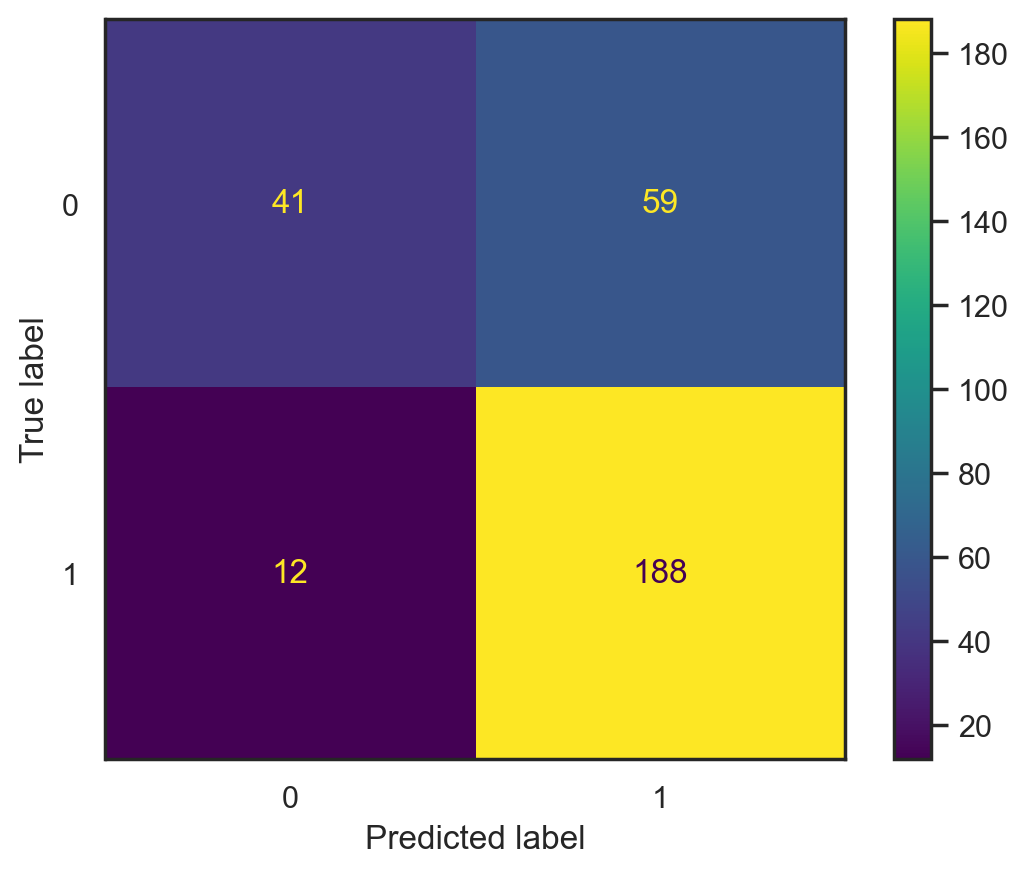

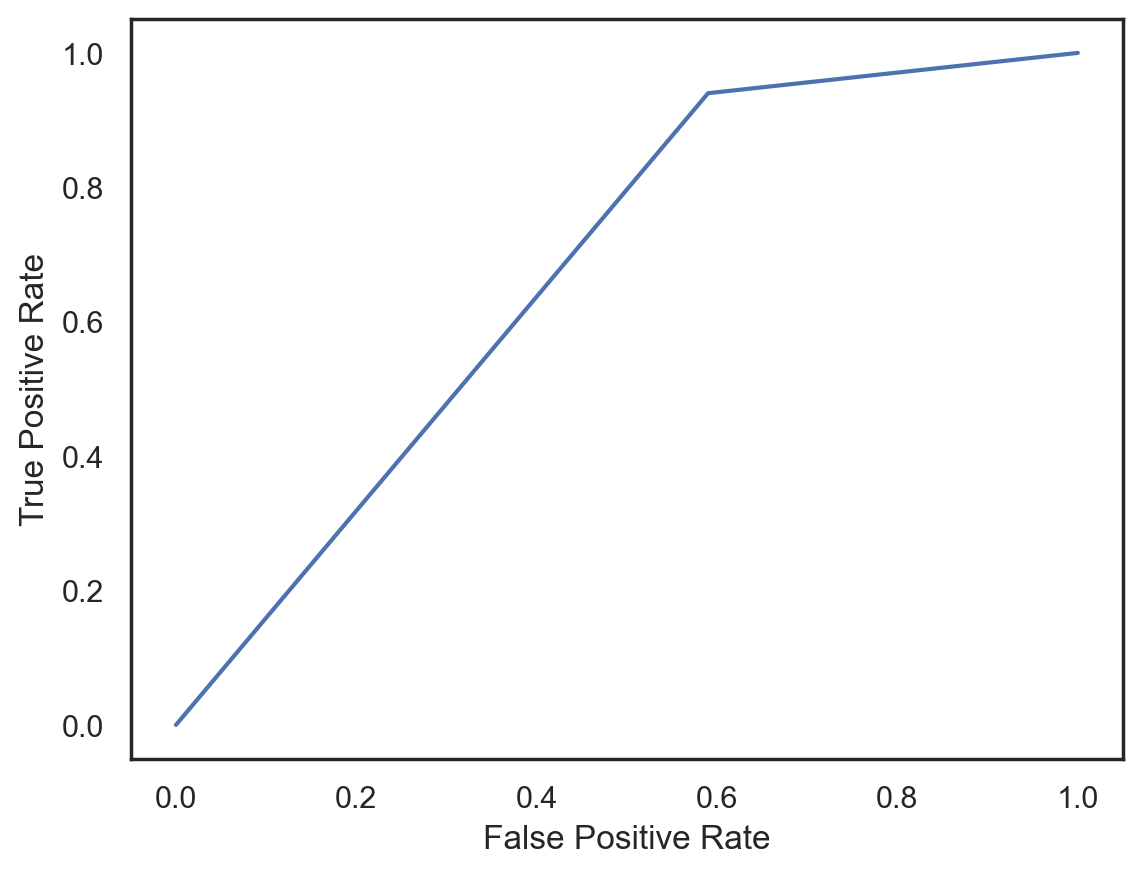

In [49]:
arvores = [50, 100, 500, 750, 1000]
for n in arvores:
    treina_rf(n)